In [1]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import svm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import geopandas as gpd
import pandas as pd

import numpy as np

np.random.seed(3108)

In [2]:
#getwd
import os
cwd = os.getcwd()
print(cwd)


C:\Users\Patri\Desktop\DS_EO


In [3]:
# Directory of GeoJSON files
data_dir = "data/GEE_aprilJuneOctober_cloud20_reducetolist"

# Find all .geojson files in the directory
geojson_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith(".geojson")]

# Create a list of GeoDataFrames for each file without adding extra columns
gdfs = []
for file in geojson_files:
    gdf = gpd.read_file(file)  # Read each GeoJSON file
    gdfs.append(gdf)

# Concatenate all GeoDataFrames into one
full_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Display the first few rows of the GeoDataFrame
print(full_gdf.head())

# Display the final dimensions of the GeoDataFrame
print(f"Final dimensions of the GeoDataFrame: {full_gdf.shape}")


                     id                                              B11_1  \
0  0000000000000000050b                                                [ ]   
1  0000000000000000050c  [ [ [ 0.30860000848770142, 0.30860000848770142...   
2  0000000000000000050d  [ [ [ 0.18799999356269836, 0.19380000233650208...   
3  0000000000000000050e  [ [ [ 0.20035000145435333, 0.20675000548362732...   
4  0000000000000000050f  [ [ [ 0.2955000102519989, 0.27259999513626099,...   

                                               B11_3  \
0  [ [ [ 0.23389999568462372, 0.23389999568462372...   
1  [ [ [ 0.34615001082420349, 0.34615001082420349...   
2  [ [ [ 0.22210000455379486, 0.22640000283718109...   
3  [ [ [ 0.22775000333786011, 0.23170000314712524...   
4  [ [ [ 0.25940001010894775, 0.25290000438690186...   

                                               B11_7  \
0  [ [ [ 0.18109999597072601, 0.18109999597072601...   
1  [ [ [ 0.27889999747276306, 0.27889999747276306...   
2  [ [ [ 0.166800007224082

In [25]:
# Save the concatenated GeoDataFrame as a GeoJSON file
full_gdf.to_file('data/merged_data_AprilJuneOctober_B2B3B4B6B8B11NDVI_cloud20.geojson', driver='GeoJSON')


In [7]:
# Print the first row of the GeoDataFrame
print(full_gdf.loc[1, 'B11_1'])


[ [ [ 0.30860000848770142, 0.30860000848770142, 0.30860000848770142, 0.34259998798370361, 0.34259998798370361, 0.34259998798370361, 0.34259998798370361, 0.33570000529289246, 0.33570000529289246, 0.33570000529289246, 0.33250001072883606 ], [ 0.30860000848770142, 0.30860000848770142, 0.30860000848770142, 0.34259998798370361, 0.34259998798370361, 0.34259998798370361, 0.34259998798370361, 0.33570000529289246, 0.33570000529289246, 0.33570000529289246, 0.33250001072883606 ], [ 0.31520000100135803, 0.31520000100135803, 0.31520000100135803, 0.33469998836517334, 0.33469998836517334, 0.33469998836517334, 0.33469998836517334, 0.32719999551773071, 0.32719999551773071, 0.32719999551773071, 0.30979999899864197 ], [ 0.31520000100135803, 0.31520000100135803, 0.31520000100135803, 0.33469998836517334, 0.33469998836517334, 0.33469998836517334, 0.33469998836517334, 0.32719999551773071, 0.32719999551773071, 0.32719999551773071, 0.30979999899864197 ], [ 0.31779998540878296, 0.31779998540878296, 0.3177999854

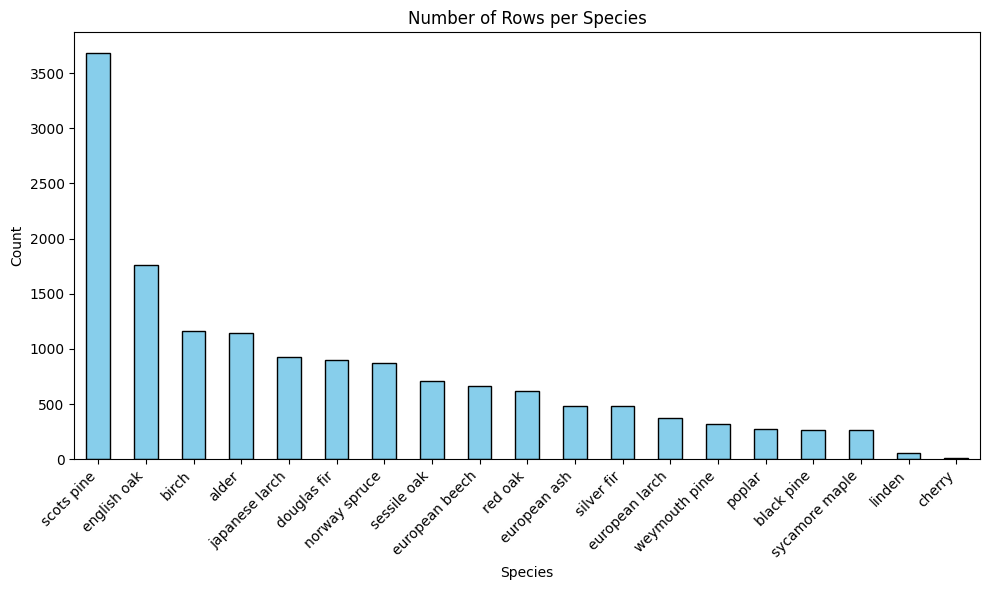

In [7]:
# Group by 'l3_species' and count the number of rows for each species
species_counts = full_gdf['l3_species'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Rows per Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()

In [ ]:
#the code below:  from merged_data to  stacked numpy and labels

In [8]:
band_data = full_gdf.iloc[:, 1:-4]
print(band_data.head())

                                               B11_1  \
0                                                [ ]   
1  [ [ [ 0.30860000848770142, 0.30860000848770142...   
2  [ [ [ 0.18799999356269836, 0.19380000233650208...   
3  [ [ [ 0.20035000145435333, 0.20675000548362732...   
4  [ [ [ 0.2955000102519989, 0.27259999513626099,...   

                                               B11_3  \
0  [ [ [ 0.23389999568462372, 0.23389999568462372...   
1  [ [ [ 0.34615001082420349, 0.34615001082420349...   
2  [ [ [ 0.22210000455379486, 0.22640000283718109...   
3  [ [ [ 0.22775000333786011, 0.23170000314712524...   
4  [ [ [ 0.25940001010894775, 0.25290000438690186...   

                                               B11_7  \
0  [ [ [ 0.18109999597072601, 0.18109999597072601...   
1  [ [ [ 0.27889999747276306, 0.27889999747276306...   
2  [ [ [ 0.16680000722408295, 0.17675000429153442...   
3  [ [ [ 0.18279999494552612, 0.19370000064373016...   
4  [ [ [ 0.26530000567436218, 0.25920000672340

In [9]:
import ast

# Apply ast.literal_eval to all columns that contain the band data
for band in band_data.columns:
    band_data[band] = band_data[band].apply(ast.literal_eval)

In [10]:
import numpy as np

# Initialize the 4D array to store the reshaped data
rows = len(band_data)
num_bands = len(band_data.columns)  # Number of bands (21 in your case)
X = np.zeros((rows, 11, 11, num_bands), dtype=np.float32)

# Loop through the rows and fill the 4D array with the band data
for i in range(rows):
    # Get the list of all band columns for this row (converted to np arrays)
    stacked_bands = np.stack([
        np.array(band_data[band][i], dtype=np.float32) 
        for band in band_data.columns
    ], axis=-1)  # Stack along the last axis to create (11, 11, 21)

    # Assign the stacked 3D array to the corresponding slice in the 4D array
    X[i] = stacked_bands


ValueError: all input arrays must have the same shape

In [18]:
print(X.shape)


(14959, 11, 11, 21)


In [20]:
#test
print(X[:2])  # First two rows, full shape (3x3x4)

[[[[0.3086     0.34615    0.2789     ... 0.38636366 0.38238975
    0.44661885]
   [0.3086     0.34615    0.2789     ... 0.38636366 0.38238975
    0.44661885]
   [0.3086     0.34615    0.2789     ... 0.27414188 0.32837874
    0.41542733]
   ...
   [0.3357     0.3539     0.3202     ... 0.19371241 0.31763765
    0.41914693]
   [0.3357     0.3539     0.3202     ... 0.19371241 0.31763765
    0.41914693]
   [0.3325     0.3292     0.3261     ... 0.2181088  0.36519518
    0.3794187 ]]

  [[0.3086     0.34615    0.2789     ... 0.26996195 0.4198011
    0.31614348]
   [0.3086     0.34615    0.2789     ... 0.26996195 0.4198011
    0.31614348]
   [0.3086     0.34615    0.2789     ... 0.2085067  0.34738776
    0.3898451 ]
   ...
   [0.3357     0.3539     0.3202     ... 0.194451   0.33277938
    0.4211445 ]
   [0.3357     0.3539     0.3202     ... 0.194451   0.33277938
    0.4211445 ]
   [0.3325     0.3292     0.3261     ... 0.21586713 0.40043956
    0.411029  ]]

  [[0.3152     0.34455    0.2645    

In [21]:
# Save the concatenated GeoDataFrame as a GeoJSON file
full_gdf.to_file('data/merged_data_AprilJuneOctober_B2B3B4B6B8B11NDVI_cloud20.geojson', driver='GeoJSON')


In [26]:
#create label file
# Assuming your data is loaded into df
# Get unique species
unique_species = full_gdf['l3_species'].unique()

# Create a new label DataFrame with rows = images and columns = species, initialized to 0
labels = pd.DataFrame(0, index=merged_data['id'], columns=unique_species)

# Populate the label DataFrame
for idx, row in merged_data.iterrows():
    species = row['l3_species']
    labels.loc[row['id'], species] = 1

# Reset the index for better readability (optional)
labels.reset_index(inplace=True)
labels.rename(columns={'index': 'id'}, inplace=True)
labels = labels.iloc[:, 1:]

# Show the resulting DataFrame
print(labels)

       european beech  cherry  european ash  linden  sycamore maple  \
0                   1       0             0       0               0   
1                   1       0             0       0               0   
2                   1       0             0       0               0   
3                   1       0             0       0               0   
4                   1       0             0       0               0   
...               ...     ...           ...     ...             ...   
14954               0       0             0       0               0   
14955               0       0             0       0               0   
14956               0       0             0       0               0   
14957               0       0             0       0               0   
14958               0       0             0       0               0   

       english oak  red oak  sessile oak  alder  birch  poplar  douglas fir  \
0                0        0            0      0      0       0      

In [27]:
labels = labels.values

print(labels)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
